<div><h1>Redis y Python</h1>
<div>
<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="30%" alt="Logo UNIR" style="float:right;" />
</div>
</div>

## Usa Redis desde Python

Recuerda que al desplegar Redis con Docker, en la terminal puedes observar el puerto de conexión del contenedor.

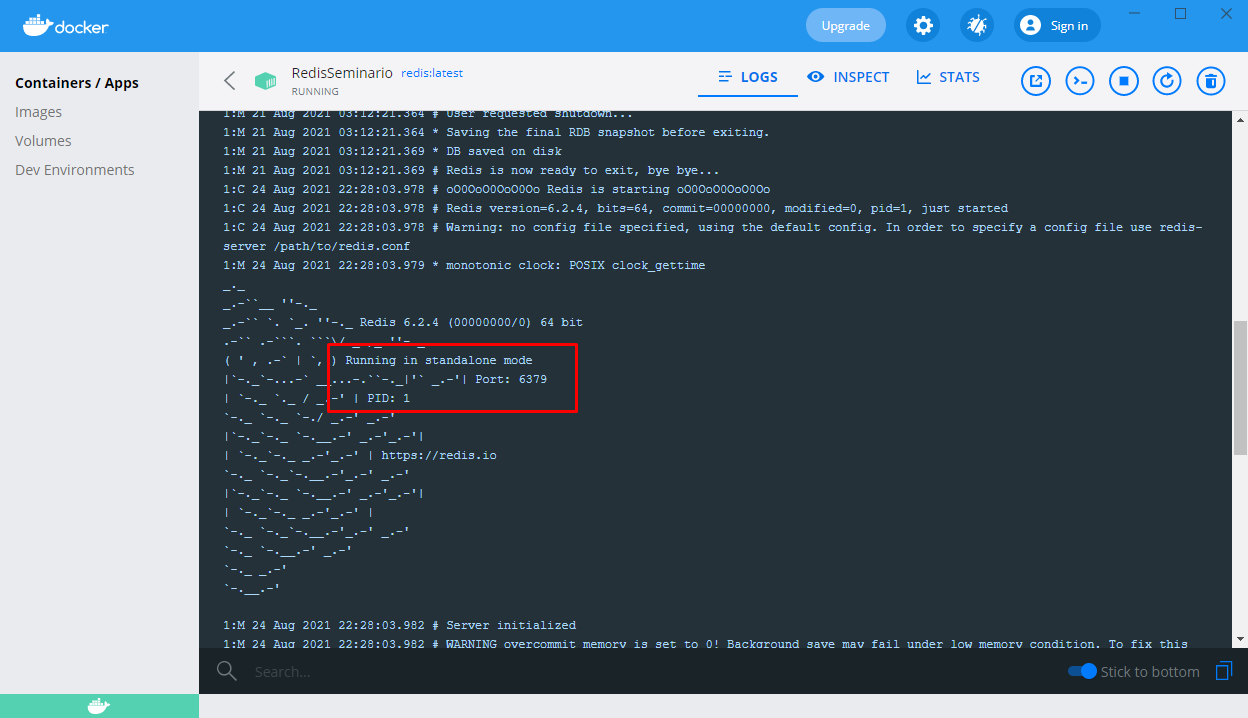

Instala la api de Redis para Python si áun no cuentas con ella.

In [ ]:
# pip install redis

In [ ]:
# pip install pottery

In [ ]:
# pip install pymongo

In [ ]:
import redis
from pymongo import MongoClient
from bson import ObjectId

In [ ]:
redis01 = redis.Redis(host='localhost', port=6379, db=0)

In [ ]:
redis01.set('usuario', 'anacardo')

In [ ]:
redis01.get('usuario')

Investiga qué diferencia hay entre la conexión `Redis` y la `StrictRedis`

In [ ]:
redis02 = redis.StrictRedis(host='localhost', port=6379, db=0)

In [ ]:
# establecer variable
redis02.set('user1', 'Camila')

In [ ]:
# Comprobar
print('El valor de "user1" es %s' % redis02.get('user1'))

In [ ]:
# cambia valores
redis02.set('user1', 'jaimito')

In [ ]:
# Comprobar
print('El valor de "user1" es %s' % redis02.get('user1'))

In [ ]:
# guardar otro valor
redis02.set('user2', 'Gina')

In [ ]:
# comprobar
print('El valor de "user2" es %s' % redis02.get('user2'))

In [ ]:
# recupera varios valores
print('Los valores de las variables "user1" y "user2" son %s' % redis02.mget('user1', 'user2'))

In [ ]:
# borra una variable
redis02.delete('user1')

In [ ]:
# comprueba
print('Los valores de "user1" y "user2" son %s' % redis02.mget('user1', 'user2'))

In [ ]:
# Tamaño de la base de datos
print('Db size: %d' % redis02.dbsize())

In [ ]:
# Uso de incrementos
print('Incrementar la variable "inc_var_01": %s' % redis02.incr('inc_var_01'))

In [ ]:
# Incrementar
print('Incrementar la variable "inc_var_01" : %s' % redis02.incr('inc_var_01'))

In [ ]:
# Incrementar
print('Incrementar la variable "inc_var_01" : %s' % redis02.incr('inc_var_01'))

In [ ]:
redis02.set('title01', '<h1>Bienbiendo a la web de Toledo</h1>')
redis02.set('title02', '<h1>Bienbiendo a la web de Galicia</h1>')
redis02.set('title03', '<h1>Bienbiendo a la web de San Sebastián</h1>')
redis02.set('title04', '<h1>Bienbiendo a la web de San Andrés</h1>')
value = redis02.get('title01') 
print(value)

In [ ]:
redis02.zadd('users', {'user01' : 125})
redis02.zadd('users', {'user02' : 156})
users = redis02.zrange('users', 0, -1)
print(users)

### Crea un Pool de Conexiones en Redis

In [ ]:
pool = redis.ConnectionPool(host='localhost', port=6379, db=0)
r = redis.Redis(connection_pool=pool)

In [ ]:
r

### Uso de Pipeline

In [ ]:
r.set('user5', 'Alejandro')
# Utilice el método pipeline() para crear una instancia de canalización
pipe = r.pipeline()
# Los siguientes comandos SET están almacenados en búfer
pipe.set('user6', 'Marcos')
pipe.get('user6')
# la llamada EXECUTE envía todos los comandos almacenados en búfer al servidor, 
# devolviendo una lista de respuestas, una para cada comando.
pipe.execute()

In [ ]:
pipe.set('user7', 'Juliana').sadd('item7', 'Chaquetón Libre').incr('inc_var_01').execute()

### Itera objetos en Python y guarda en Redis

In [ ]:
for key, value in (('item1', 'Ventilador de Pared'), ('item2', 'Camiseta'), ('item3', 'Chaqueta'), ('item4', 'Sudadera')):
    r.set(key, value)

## Consulta MongoDB y guarda resultados en Redis

Crea una base de datos llamada `Schools` con una colección `students`. El fichero `students.json` está en el directorio */data*

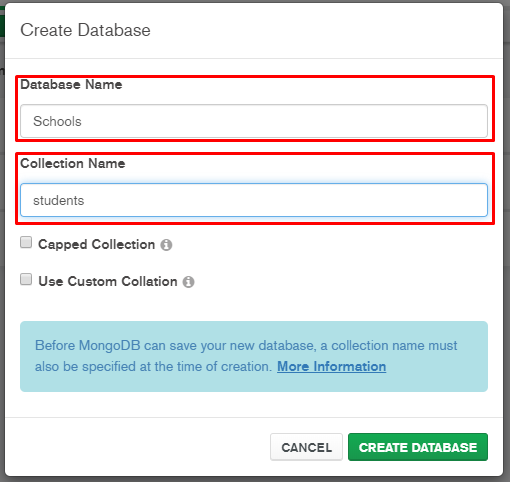

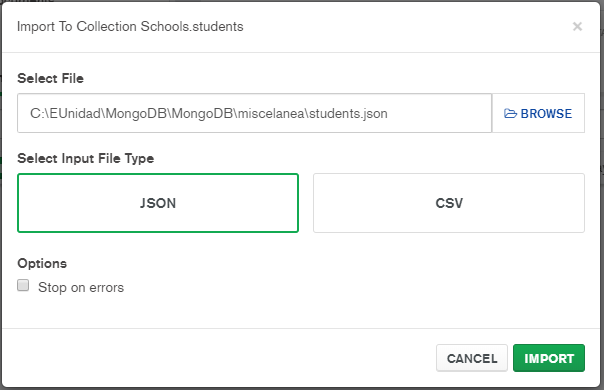

In [ ]:
db = MongoClient('mongodb://localhost:27017')['Schools']

In [ ]:
def cacheStudents(db, cache, cache_key, reset=True, limit=10):
    if reset:
        cache.delete(cache_key)

    cursor = db.students.find({},{'_id': 1}).limit(limit)

    for doc in cursor:
        cache.sadd(cache_key, doc['_id'])

In [ ]:
cache = redis.from_url('redis://localhost:6379', db=0)

In [ ]:
cache_key = 'id_students'

In [ ]:
cacheStudents(db, cache, cache_key)

In [ ]:
_id = cache.srandmember(cache_key)

In [ ]:
int(_id)

In [ ]:
doc = db['students'].find_one({'_id': int(_id)})

In [ ]:
doc

In [ ]:
_ids = [int(_id) for _id in cache.srandmember(cache_key, 5)]

In [ ]:
_ids

In [ ]:
docs = db['students'].find({'_id': {'$in': _ids}})

In [ ]:
for doc in docs:
    print(doc)

In [ ]:
r.set('user_data_01', str(doc))

In [ ]:
r.get('user_data_01')

## Otras APIs de Python

### Uso de Dict Redis con API de Python (pottery)

In [ ]:
from redis import Redis
from pottery import RedisDict
from pottery import RedisList
from pottery import RedisCounter
from pottery import NextId
from pottery import redis_cache

redis03 = Redis.from_url('redis://localhost:6379/1')

**<span style="color: red">Importante</span>**: aunque consultes el contenido del objeto conexión, esto no será suficiente para saber si la conexión se ha establecido correctamente.

**<span style="color: red">RedisDict</span>** es una librería respaldada por Redis compatible con el dict de Python.
Como podrá darse cuenta a continuación, las claves y los valores deben ser serializables JSON.

<span style="color: green">*Nota: si intentas ejecutar varias veces la siguiente celda, te darás cuenta que en Redis ya existe una key llamada `idUsers`.*</span>

In [ ]:
redis03.delete('idUsers')

In [ ]:
idUsers = RedisDict({'Pepe': 12500, 'Carlo': 1500}, redis=redis03, key='idUsers')
idUsers['Anna'] = 21563
idUsers

Borra la clave si lo consideras necesario (siguiente celda)

In [ ]:
# redis03.delete('idUsers')

In [ ]:
idUsers['Pepe']

In [ ]:
del idUsers['Carlo']

In [ ]:
idUsers['Aroa'] = 213652
idUsers

In [ ]:
list(idUsers)

In [ ]:
sorted(idUsers)

In [ ]:
'Aroa' in idUsers

In [ ]:
'Joaco' not in idUsers

### Uso de Listas Redis con API de Python (pottery)

In [ ]:
squares = RedisList([1, 4, 9, 16, 25], redis=redis03, key='squares2')

In [ ]:
# redis03.delete('squares')

In [ ]:
squares

In [ ]:
squares[0]

In [ ]:
squares[-1]

In [ ]:
squares[-3:]

In [ ]:
squares[:]

In [ ]:
squares + [88, 47, 55, 26, 4581]

### Uso de Contadores Redis con API de Python (pottery)

In [ ]:
redis03.delete('counter001')

In [ ]:
count01 = RedisCounter(redis=redis03, key='counter001')
count01 = RedisCounter('abcdefg', redis=redis03, key='counter001')

In [ ]:
sorted(count01.elements())

In [ ]:
count01.clear()

In [ ]:
redis03.delete('counter001')

In [ ]:
count01 = RedisCounter({'fila1': 2, 'fila2': 3}, redis=redis03, key='counter001')
count01.clear()
count01 = RedisCounter(redis=redis03, key='counter001', fila3=4, fila4=8)
count01.clear()

In [ ]:
count01 = RedisCounter(['fila10', 'fila11'], redis=redis03, key='counter001')
count01['fila12']

In [ ]:
sorted(count01.elements())

In [ ]:
count01.clear()
RedisCounter('abracadabra', redis=redis03, key='counter001').most_common(10)

In [ ]:
count01.clear()
count01 = RedisCounter(redis=redis03, key='counter001', a=4, b=2, c=0, d=-2)

from collections import Counter

d = Counter(a=1, b=2, c=3, d=4)
count01.subtract(d)
count01

### Uso de NextId Redis con API de Python (pottery)

In [ ]:
idSessions = NextId(key='idSessions', masters={redis03})

In [ ]:
next(idSessions)

In [ ]:
next(idSessions)

In [ ]:
next(idSessions)

In [ ]:
next(idSessions)

In [ ]:
next(idSessions)

### Uso de Cache con API pottery

`redis_cache()` es una simple caché de valor de retorno de función ilimitada y ligera. `redis_cache()` implementa la API `functools.cache()` de Python con mucha similitud en funcionalidad. Esto permite usar `redis_cache()` de la misma manera que usa `functools.cache()`.

Tenga en cuenta que...

- Los argumentos de la función deben ser hash.

- Los valores de retorno de la función deben ser serializables JSON.

- Al igual que `functools.cache()`, `redis_cache()` no permite un tamaño máximo, no desaloja los valores antiguos y crece sin límites. 

Solo use `redis_cache()` en uno de estos casos:

- El espacio de argumentos de su función tiene una pequeña cardinalidad conocida.
- Se especifica un tiempo de espera cuando llama a `redis_cache()` para decorar su función, para volcar todo el tiempo de espera de la caché de valor de retorno segundos después del último acceso a la caché (acertar o fallar).
- Periódicamente llama a `.cache_clear()` para volcar su caché de valor de retorno completo.
- Cuando no importa que la caché crezca sin límites, asumiendo las implicaciones de esto para su instancia de Redis.
- En general, solo debe usar `redis_cache()` cuando desee reutilizar valores calculados previamente. En consecuencia, no tiene sentido almacenar en caché funciones con efectos secundarios o funciones impuras como `time()` o `random()`.

In [ ]:
db = MongoClient('mongodb://localhost:27017')['Schools']

In [ ]:
@redis_cache(redis=redis03, key='get_data_student_cache')
def get_data_student(_id):
    doc = db['students'].find_one({'_id': int(_id)})
    return doc

In [ ]:
get_data_student.cache_clear()

In [ ]:
get_data_student.cache_info()

In [ ]:
get_data_student(5)

In [ ]:
get_data_student.cache_info()

In [ ]:
get_data_student(5)

In [ ]:
get_data_student.cache_info()

In [ ]:
get_data_student(5)

In [ ]:
get_data_student.cache_info()

In [ ]:
get_data_student(8)

In [ ]:
get_data_student.cache_info()

Observe los dos argumentos para la función `redis_cache()`: el primero es el cliente de Redis, el segundo es el nombre de la clave de Redis para la caché de valor de retorno de su función.

A continuación, se consulta el valor de la variable en Redis que almacena los datos que están en caché.

In [ ]:
val_cache = redis03.hgetall('get_data_student_cache')
val_cache

La primera llamada a la función `get_data_student()` toma 1 segundo y da como resultado una pérdida `misses` de caché; pero la segunda llamada regresa casi inmediatamente y da como resultado un acierto `hits` de caché. 

Esto se debe a que después de la primera llamada, redis_cache() almacena en caché el valor de retorno de la llamada cuando _id == 5.

Puede acceder a su función costosa subyacente original sin decorar () como función cara costosa .__ envuelto__. Esto es útil para la introspección, para omitir el caché o para volver a empaquetar la función original con un caché diferente.

Utilice la siguiente función para limpiar la caché: `get_data_student.cache_info()`

In [ ]:
get_data_student.cache_info()